In [3]:
from PIL import Image
import numpy as np
import requests

In [5]:
image = Image.open("test_img.JPG")

files = {"file":open("test_img.JPG", 'rb')}

response = requests.post("http://172.16.7.21:5001/predict", files=files)

print(response)

<Response [404]>


In [15]:
import io

image = Image.open(io.BytesIO(response.content))

image.save("result.jpg")

In [59]:
import io

image = Image.open("test_img.JPG")

files = [('file', open("IMG_2627.JPG", 'rb')), ('file', open("IMG_2629.JPG", 'rb')), ('file', open("test_img.JPG", 'rb')), ('file', open("test_img.JPG", 'rb'))]

response = requests.post("http://172.16.7.21:4000/api/predict", files=files)

print(response)

image = Image.open(io.BytesIO(response.content))

image.save("result.jpg")


FileNotFoundError: [Errno 2] No such file or directory: 'IMG_2627.JPG'

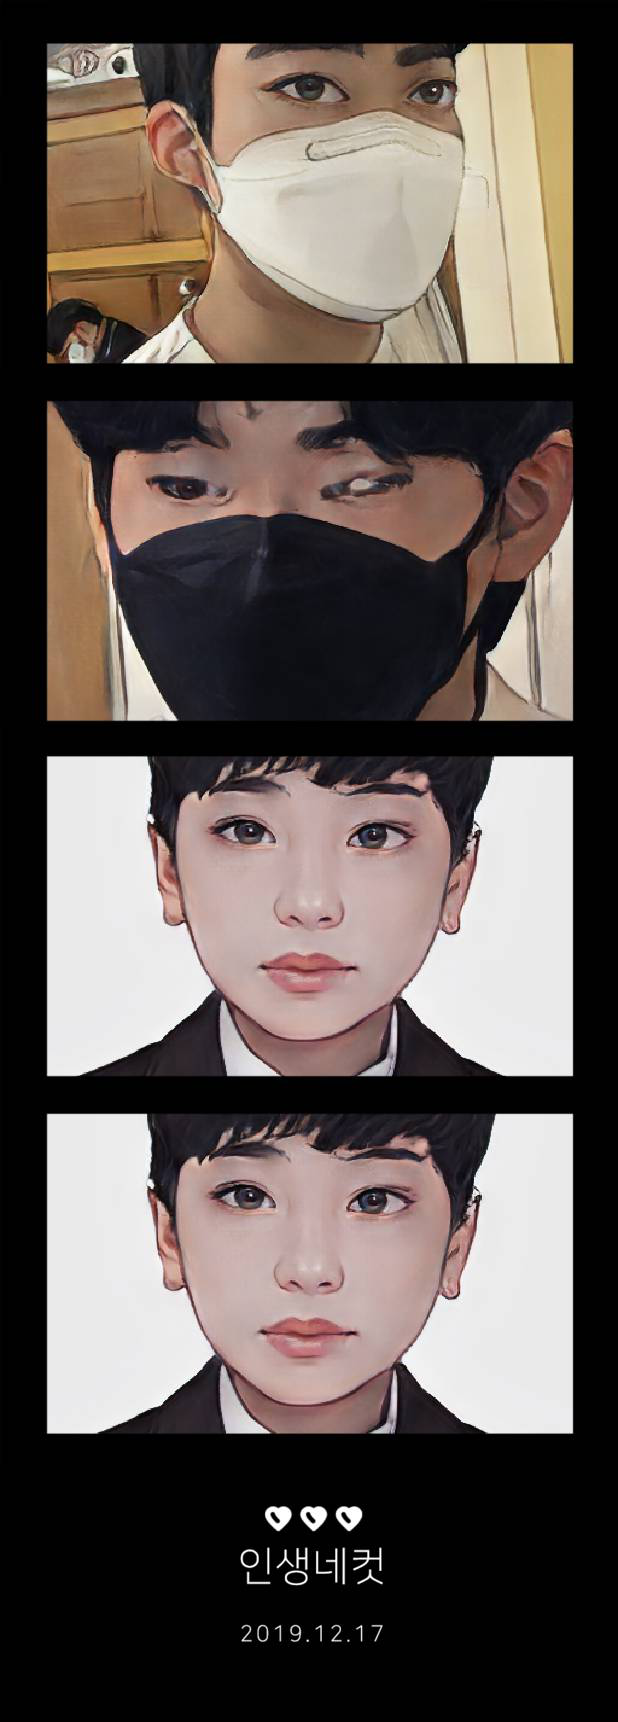

In [64]:
image

In [52]:
from PIL import Image

sample = Image.open("./test_img.JPG")

w, h = sample.size

w, h

(354, 472)

In [56]:

target_width = 618
new_height = int(target_width / w * h)

new_size = (target_width, new_height)

sample = sample.resize(new_size, resample=Image.Resampling.NEAREST)

In [57]:
crop_area = (0, new_height/2-365/2,618, new_height/2+365/2)
crop_area

(0, 229.5, 618, 594.5)

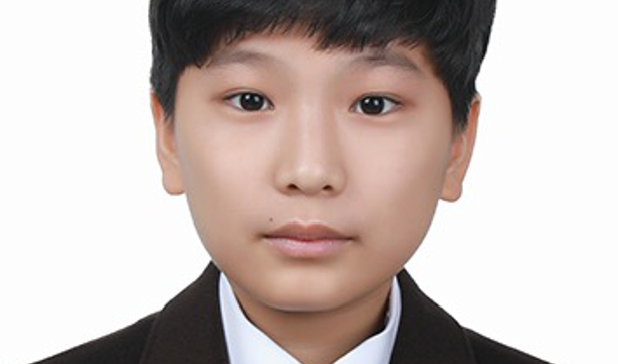

In [58]:
sample.crop(crop_area)

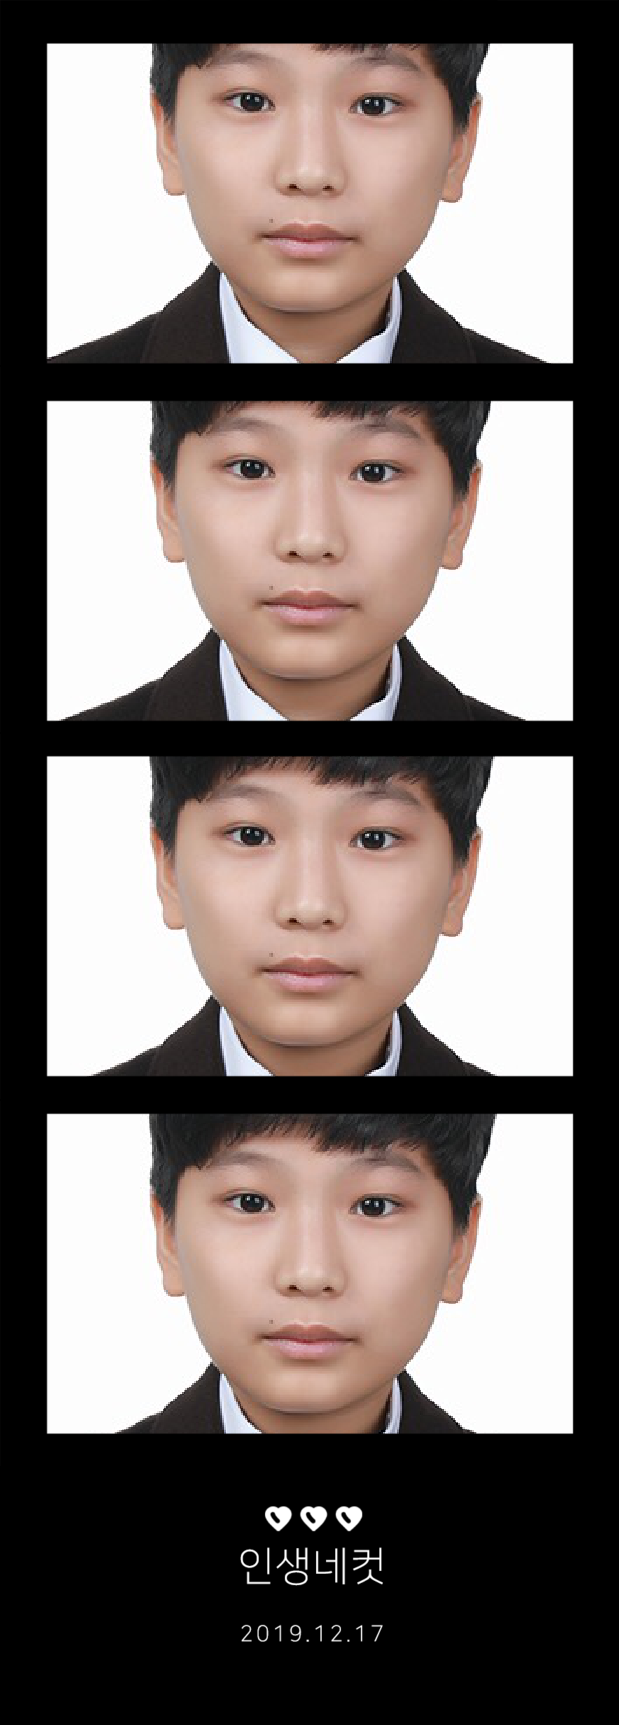

In [15]:
from PIL import Image

def resize_image_fit_frame(image, target_width):
    w, h = image.size

    new_height = int(target_width / w * h)

    new_size = (target_width, new_height)

    image = image.resize(new_size, resample=Image.Resampling.NEAREST)

    crop_area = (0, new_height/2-365/2,618, new_height/2+365/2)

    image = image.crop(crop_area)

    return image


def image_frame(imgs):
    background = Image.open("./restapi/app/frame.png")
    w, original_h = background.size
    # w, h = (618, 365)
    h = original_h / 4.7

    grid = Image.new("RGB", size=(w, original_h))

    for i, img in enumerate(imgs):  
        resized_img = resize_image_fit_frame(img, w)
        grid.paste(resized_img, box=(0, int(i*h)))

    
    grid.paste(background, (0, 0), background)

    return grid


t_img = Image.open("test_img.JPG")
images = [t_img, t_img, t_img, t_img]
f = image_frame(images)

f

In [9]:
from PIL import Image

frame = Image.open("./restapi/app/romela_frame.png")

frame.size

(618, 1716)

In [10]:
from imgurpython import ImgurClient
from datetime import datetime

client_id = "" 
client_secret = ''

client = ImgurClient(client_id, client_secret)
authorization_url = client.get_auth_url('pin')

credentials = client.authorize("398d16e389", "pin")
client.set_user_auth(credentials['access_token'], credentials['refresh_token'])


# config = {
# 		'album': "인생네컷",
# 		'name':  'Test!',
# 		'title': 'Catastrophe!',
# 		'description': 'on {0}'.format(datetime.now())
# }
# client.upload_from_path("./restapi/app/romela_frame.png", config=config, anon=False)

In [11]:
authorization_url

'https://api.imgur.com/oauth2/authorize?client_id=b6a9ced3148a1b3&response_type=pin'

In [15]:
from cloudinary.uploader import upload
from cloudinary.utils import cloudinary_url

upload_result = upload("./restapi/app/romela_frame.png", 
public_id = "myfolder/life_as_four_picture"
)

thumbnail_url1, options = cloudinary_url(upload_result['public_id'], format="jpg", crop="fill", width=100,
                                                     height=100)
thumbnail_url2, options = cloudinary_url(upload_result['public_id'], format="jpg", crop="fill", width=200,
                                                     height=100, radius=20, effect="sepia")

ValueError: Must supply api_key

In [1]:
import requests, json
import pyimgur

CLIENT_ID = "b6a9ced3148a1b3"
path = "./result.jpg"


im = pyimgur.Imgur(CLIENT_ID)
uploaded_image = im.upload_image(path, title="인생네컷")

print(uploaded_image.title)
print(uploaded_image.link)

인생네컷
https://i.imgur.com/NMc2vbo.jpg


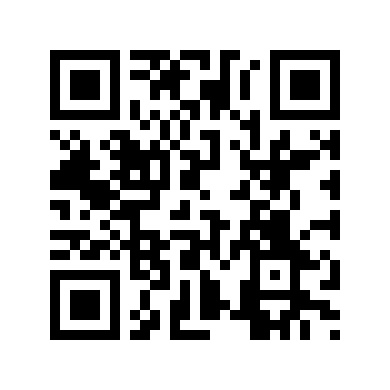

In [3]:
import qrcode


input_data = uploaded_image.link
#Creating an instance of qrcode
qr = qrcode.QRCode(
        version=1,
        box_size=10,
        border=5)
qr.add_data(input_data)
qr.make(fit=True)

img = qr.make_image(fill='black', back_color='white')
img

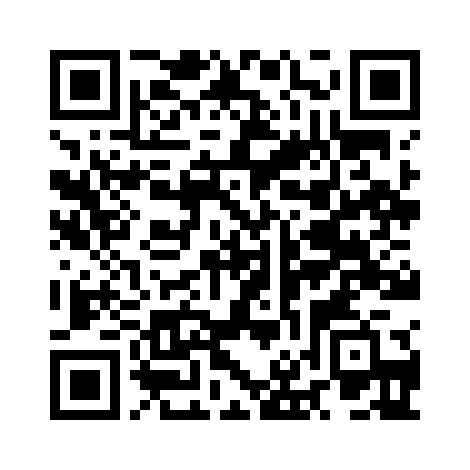

In [6]:

qr.add_data("https://google.com")
qr.make(fit=True)
img = qr.make_image(fill="black", back_color="white")
img

In [8]:
type(img)

qrcode.image.pil.PilImage

In [49]:
text_pos = {
    "frame_black":((618/2-30, 1600), (255, 255,255)),
    "frame_blue":((618/2-30, 1680), (255, 255, 255)),
    "frame_purple":((618/2-30, 1650), (255, 255, 255)),
    "frame_white":((618/2-30, 1680), (0, 0, 0)),
    "frame_green":((618/2-30, 1680), (0, 0, 0)),
    "frame_red":((618/2-30, 1680), (255, 255, 255))

}

from PIL import Image

frame = Image.open("../restapi/app/romela_frame.png")

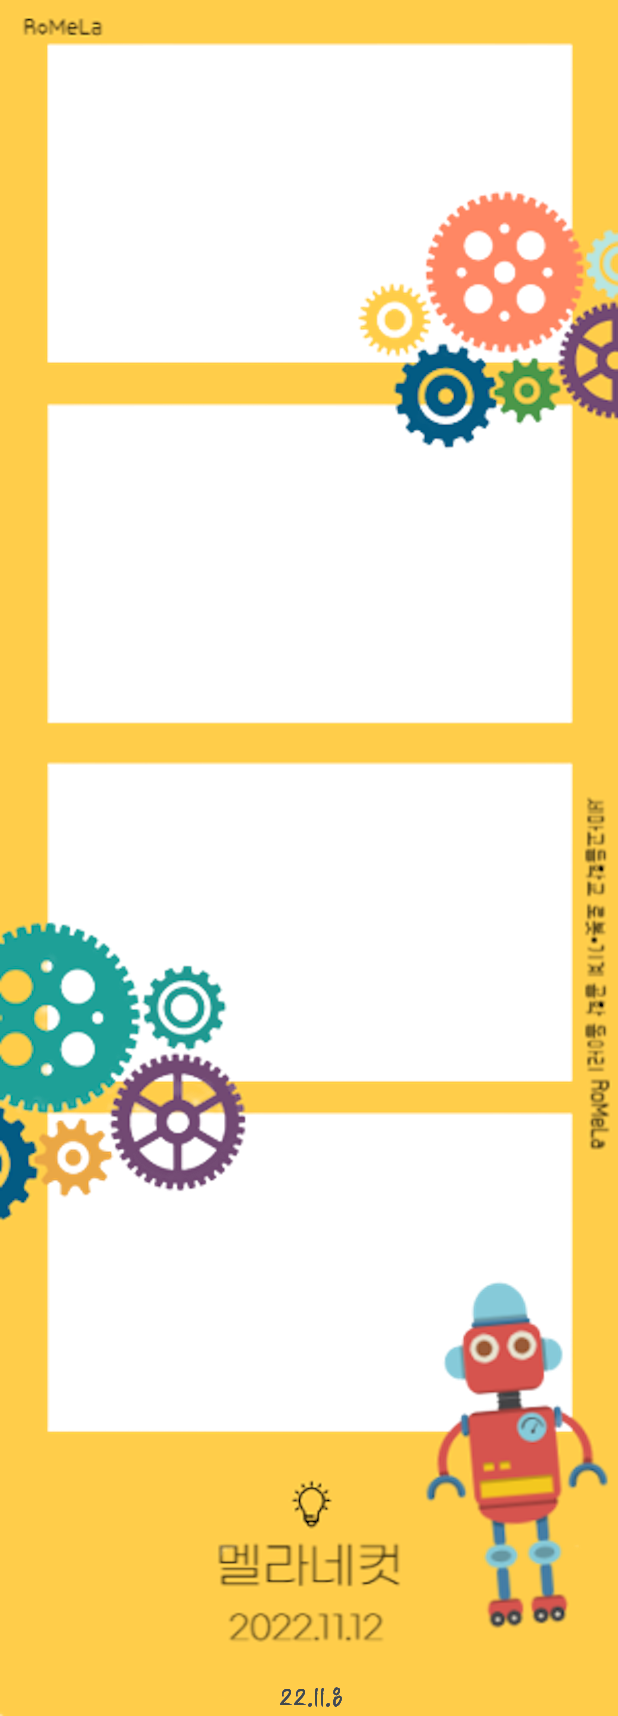

In [58]:
from PIL import ImageDraw
from PIL import ImageFont
 
I1 = ImageDraw.Draw(frame)

myFont = ImageFont.truetype('Woojin_Hyun.ttf', 30)
I1.text((618/2-30, 1680),  "22.11.8", font=myFont,  fill=	(65,74,76))

frame

Using cache found in C:\Users\YSH/.cache\torch\hub\AK391_animegan2-pytorch_main
Using cache found in C:\Users\YSH/.cache\torch\hub\AK391_animegan2-pytorch_main
C:\Users\YSH\AppData\Local\Temp\ipykernel_8584\851926736.py:41: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  image = image.resize(new_size, resample=Image.ANTIALIAS)


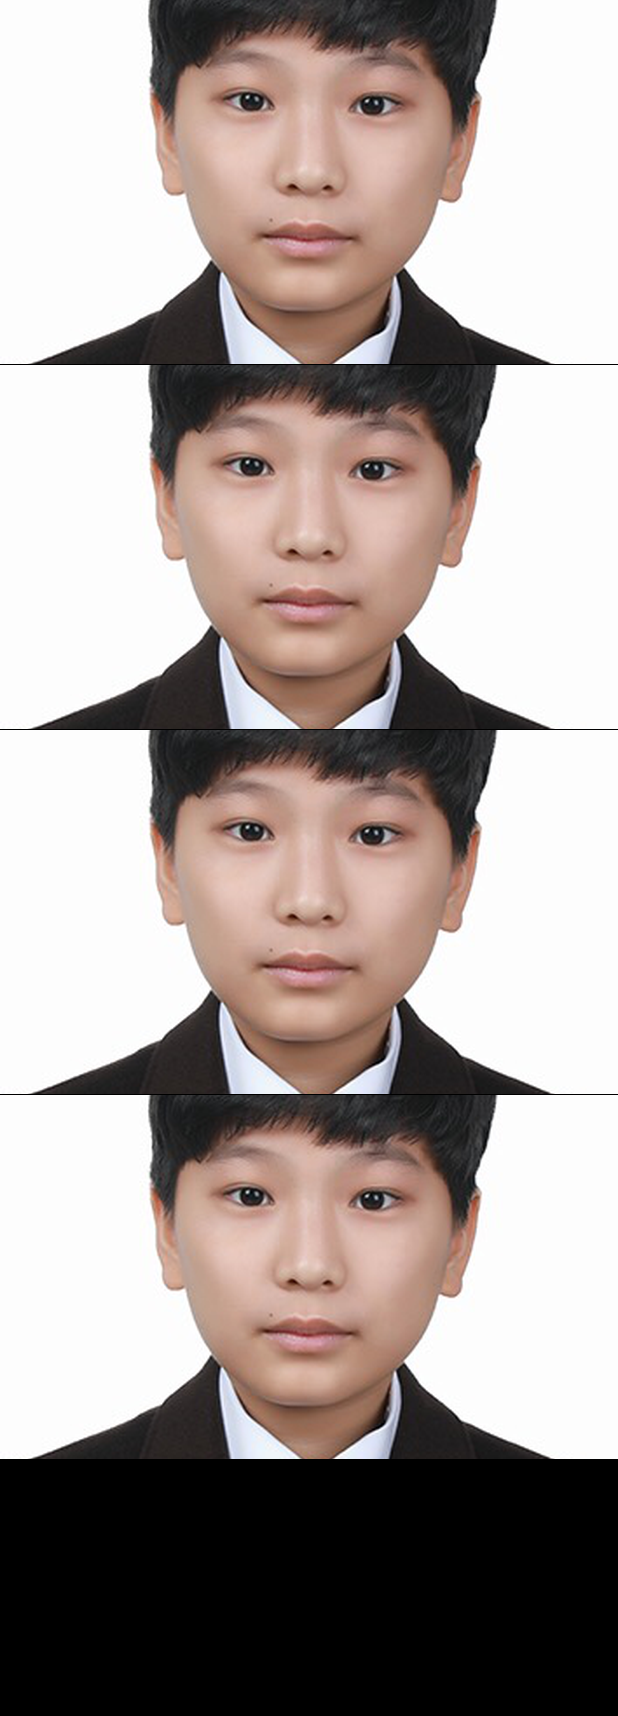

In [9]:
import torch 
from PIL import Image
from datetime import date

model2 = torch.hub.load(
    "AK391/animegan2-pytorch:main",
    "generator",
    pretrained=True,
    device="cpu",
    progress=True
)


face2paint = torch.hub.load(
    'AK391/animegan2-pytorch:main', 'face2paint', 
    size=512, device="cpu",side_by_side=False
)


def img2anime(img):
    out = face2paint(model2, img)
    return out


def drawText(image, info):
    pos, text, font, rgb_color = info

    I1 = ImageDraw.Draw(image)

    I1.text(pos,  text, font=font,  fill=rgb_color)

    return image

def resize_image_to_fit_frame(image, target_width):
    w, h = image.size

    new_height = int(target_width / w * h)

    new_size = (target_width, new_height)

    image = image.resize(new_size, resample=Image.ANTIALIAS)

    crop_area = (0, new_height/2-365/2, 618, new_height/2+365/2)

    image = image.crop(crop_area)

    return image


def get_today():
    today = date.today()
    return today.strftime("%y.%m.%d")


def make_image_frame(imgs, frame, ai=False):
    text_pos = {
        "frame_black": ((618/2-30, 1600), (255, 255, 255)),
        "frame_blue": ((618/2-30, 1680), (255, 255, 255)),
        "frame_purple": ((618/2-30, 1650), (255, 255, 255)),
        "frame_white": ((618/2-30, 1680), (0, 0, 0)),
        "frame_green": ((618/2-30, 1680), (0, 0, 0)),
        "frame_red": ((618/2-30, 1680), (255, 255, 255))
    }

    frames = ['../restapi/app/romela_frame.png', '../restapi/app/frame_red.png', '../restapi/app/frame_green.png',
              '../restapi/app/frame_blue.png', '../restapi/app/frame_purple.png', '../restapi/app/frame_white.png', '../restapi/app/frame_black.png', ]

    t_frame = frames[int(frame)]

    background = Image.open(t_frame)
    w, original_h = background.size
    # w, h = (618, 365)
    h = original_h / 4.7

    grid = Image.new("RGB", size=(w, original_h))

    for i, img in enumerate(imgs):
        resized_img = resize_image_to_fit_frame(img, w)
        grid.paste(resized_img, box=(0, int(i*h)))


    if ai:
        grid = img2anime(grid)

    grid.paste(background, (0, 0), background)

    t_frame_key = t_frame.split(".")[-2].split("/")[-1]

    if t_frame_key == "romela_frame":
        return grid

    pos, rgb_color = text_pos.get(t_frame_key)
    myFont = ImageFont.truetype('./app/Woojin_Hyun.ttf', 30)
    t_text = get_today()

    result = drawText(grid, (pos, t_text, myFont, rgb_color))

    return result

images = []
for i in range(4):
    images.append(Image.open("./test_img.JPG"))

result = make_image_frame(images, 0, True)

result

In [4]:
result.size

(512, 512)

In [ ]:
import torch.onnx

import torch 
from PIL import Image

model2 = torch.hub.load(
    "AK391/animegan2-pytorch:main",
    "generator",
    pretrained=True,
    device="cpu",
    progress=True
)


face2paint = torch.hub.load(
    'AK391/animegan2-pytorch:main', 'face2paint', 
    size=512, device="cpu",side_by_side=False
)

dummy_data = torch.empty(1, 3, 224, 224, dtype = torch.float32)
torch.onnx.export(net, dummy_data, "output.onnx")

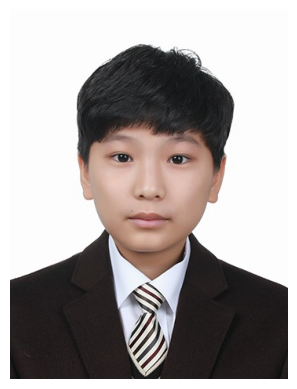

In [18]:
# Import Libraries
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load base image
img = cv2.imread("./test_img.JPG")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.axis("off")
plt.show()

In [19]:
# List of models for each image
models = [
    "the_scream.t7",
]

In [20]:
# Apply Neural Style Transfer
output_dic = {}
for i, mod in enumerate(models):
    text = str(mod)[:-3]
    style = cv2.imread(os.path.join("./art", text + ".jpg"))

    # Load Neural Transfer Style Model
    model_neural = cv2.dnn.readNetFromTorch(os.path.join("./art", mod))

    # Resize and make smaller (takes forever to perform on large images)
    height, width = img.shape[0], img.shape[1]
    new_height = 640
    new_width = int((new_height/height) * width)
    new_img = cv2.resize(
        img, 
        (new_width, new_height),
        interpolation = cv2.INTER_AREA
    )

    # Create a blob from the image and perform a forward pass considering the mean (R, G, B) values from ImageNet 
    R, G, B = 103.93, 116.77, 123.68
    input_blob = cv2.dnn.blobFromImage(
        new_img,
        1,
        (new_width, new_height),
        (R, G, B),
        swapRB = False,
        crop = False
    )
    model_neural.setInput(input_blob)
    output = model_neural.forward()
    
    # Reshape the output Tensor
    output = output.reshape(output.shape[1], output.shape[2], output.shape[3])
    # Adding the mean (R, G, B) values from ImageNet
    output[0] += R
    output[1] += G
    output[2] += B
   
    # Normalize output
    output /= 255
    # Ensure range of values in between (0, 1)
    output = output.clip(0, 1)
    output = output.transpose(1, 2, 0)
    
    output_dic[text] = output

error: OpenCV(4.6.0) D:\a\opencv-python\opencv-python\opencv\modules\dnn\src\torch\THDiskFile.cpp:496: error: (-2:Unspecified error) cannot open <./art\the_scream.t7> in mode r  in function 'TH::THDiskFile_new'


In [55]:
from flask import send_file
import base64
from PIL import Image
from PIL import ImageDraw
from PIL import ImageFont
from datetime import date
from io import BytesIO

def img_to_base64_str(img):
    buffered = BytesIO()
    img.save(buffered, format="PNG")
    buffered.seek(0)
    img_byte = buffered.getvalue()
    img_str = "data:image/png;base64,"+base64.b64encode(img_byte).decode()
    return img_str


files = open("./arts/the_scream.jpg", "rb")

upload = {'file': files}

import requests

headers = {
    'accept': 'image/jpg',
    'Content-Type': 'multipart/form-data',
}
r = requests.post(
    "https://master-white-box-cartoonization-psi1104.endpoint.ainize.ai/predict",
    files={'file_type': (None, 'image'),'source': ('result.jpg', open('result.jpg', 'rb'), 'image/jpg')}
)

r.json()

JSONDecodeError: Expecting value: line 1 column 1 (char 0)

In [57]:
r.body

AttributeError: 'Response' object has no attribute 'body'